In [1]:
import numpy as np
import pandas as pd

output_label = "country"

data = pd.read_csv("wine_quality_1000.csv")
X_DATA = data.loc[:, data.columns != output_label]
Y_DATA = data.loc[:, [output_label]]

print(X_DATA.iloc[0])

Unnamed: 0                                                 87131
description    Very good Dry Creek Zin, robust and dry and sp...
points                                                        89
price                                                       25.0
variety                                                Zinfandel
Name: 0, dtype: object


In [2]:
print(Y_DATA.iloc[0])

country    US
Name: 0, dtype: object


In [3]:
print(X_DATA.shape)
print(Y_DATA.shape)

(1000, 5)
(1000, 1)


In [4]:
import matplotlib.pyplot as plt
feature_names = X_DATA.columns
num_features = len(feature_names)
print(f"Number of features: {num_features}")
print(f"Feature names:\n {feature_names}")

Number of features: 5
Feature names:
 Index(['Unnamed: 0', 'description', 'points', 'price', 'variety'], dtype='object')


In [5]:
unique_countries, y_val_indices = np.unique(Y_DATA, return_inverse=True)
Y_vals = np.array(y_val_indices)
print(f"Number of countries: {max(y_val_indices)}")
print(Y_vals[:5])

Number of countries: [3]
[[3]
 [0]
 [3]
 [3]
 [3]]


In [6]:
from collections import Counter

flattened = Y_vals.flatten()

# Count the occurrences of each number
counter = Counter(flattened)

# Get the most common numbers
most_common = counter.most_common(10)
print([(c, unique_countries[c[0]]) for c in most_common])

[((np.int64(3), 622), 'US'), ((np.int64(1), 174), 'Italy'), ((np.int64(0), 133), 'France'), ((np.int64(2), 71), 'Spain')]


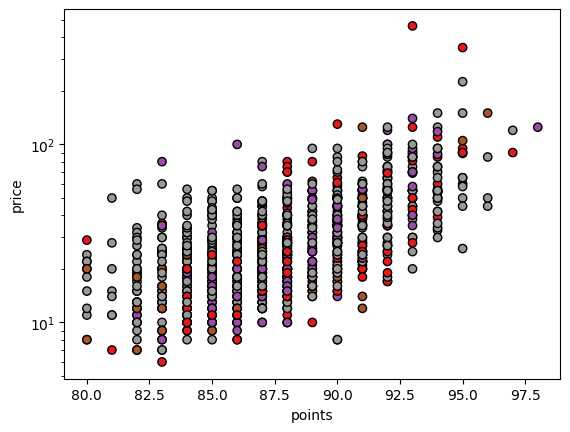

In [7]:
plt.figure()
xColName = "points"
yColName = "price"
plt.scatter(X_DATA[xColName], X_DATA[yColName], c=y_val_indices, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel(xColName)
plt.ylabel(yColName)
plt.yscale("log")
plt.show()

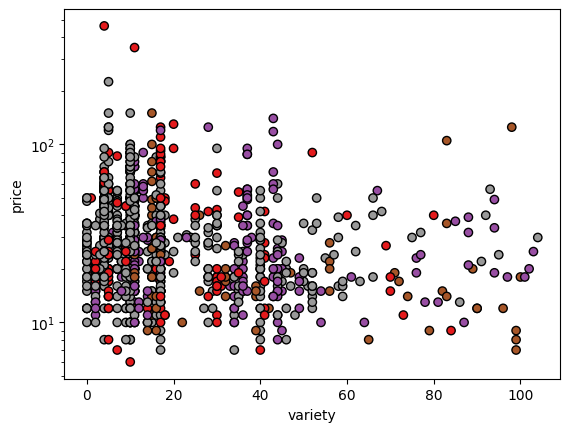

In [8]:
plt.figure()
xColName = "variety"
yColName = "price"

variety_numeric = pd.factorize(X_DATA[xColName])[0]

plt.scatter(variety_numeric, X_DATA[yColName], c=y_val_indices, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel(xColName)
plt.ylabel(yColName)

plt.yscale('log')

plt.show()


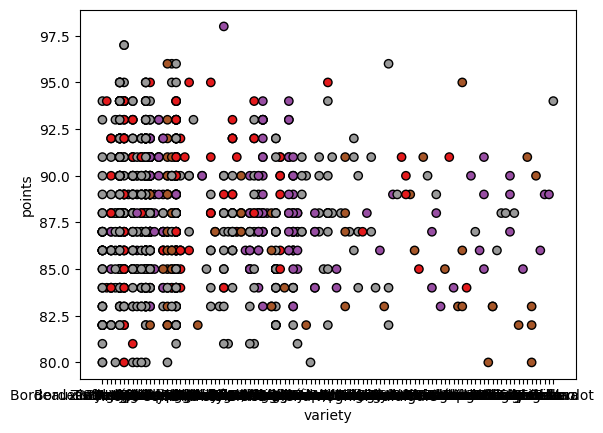

In [9]:
plt.figure()
xColName = "variety"
yColName = "points"
plt.scatter(X_DATA[xColName], X_DATA[yColName], c=y_val_indices, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel(xColName)
plt.ylabel(yColName)

plt.show()

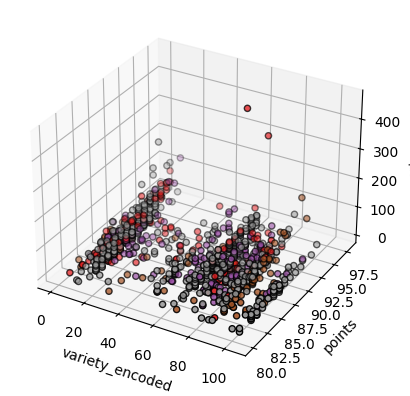

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_variety = label_encoder.fit_transform(X_DATA['variety'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xColName = "variety_encoded"
yColName = "points"
zColName = "price"

ax.scatter(encoded_variety, X_DATA[yColName], X_DATA[zColName], c=y_val_indices, cmap=plt.cm.Set1, edgecolors='k')

ax.set_xlabel(xColName)
ax.set_ylabel(yColName)
ax.set_zlabel(zColName)

plt.show()


C:\Users\gamin\AppData\Local\Temp\ipykernel_24348\225513057.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_DATA['points'] = X_DATA['points'].clip(upper=100)
C:\Users\gamin\AppData\Local\Temp\ipykernel_24348\225513057.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_DATA['price'] = X_DATA['price'].clip(upper=100)


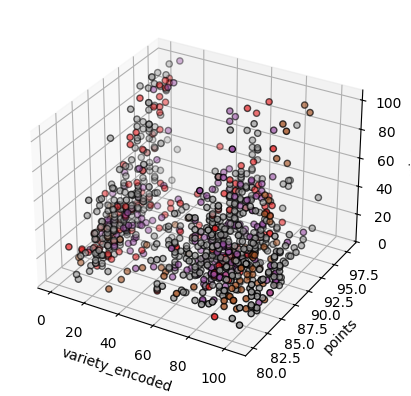

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
encoded_variety = label_encoder.fit_transform(X_DATA['variety'])

# Cap values over 100
X_DATA['points'] = X_DATA['points'].clip(upper=100)
X_DATA['price'] = X_DATA['price'].clip(upper=100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xColName = "variety_encoded"
yColName = "points"
zColName = "price"

# Scatter plot
ax.scatter(encoded_variety, X_DATA[yColName], X_DATA[zColName], c=y_val_indices, cmap=plt.cm.Set1, edgecolors='k')

# Set axis labels
ax.set_xlabel(xColName)
ax.set_ylabel(yColName)
ax.set_zlabel(zColName)

plt.show()


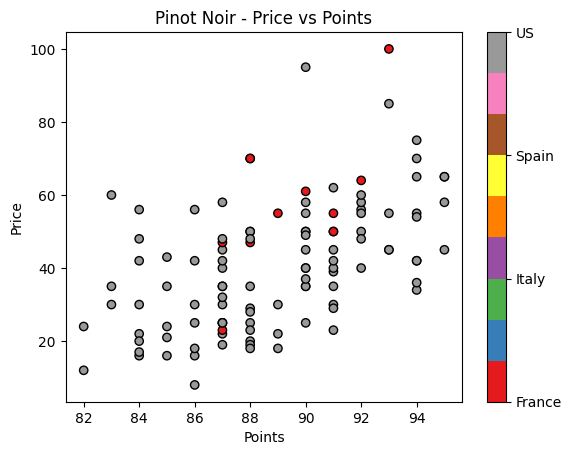

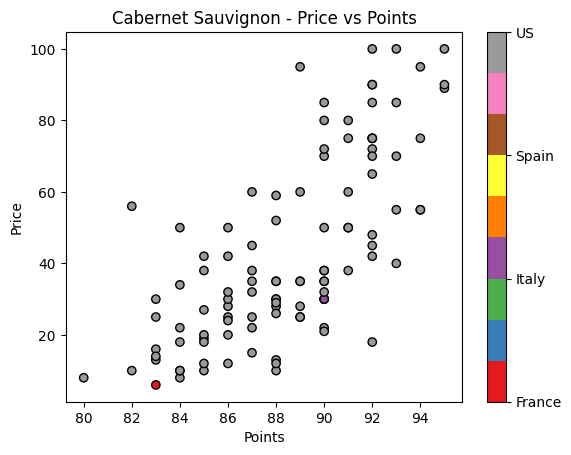

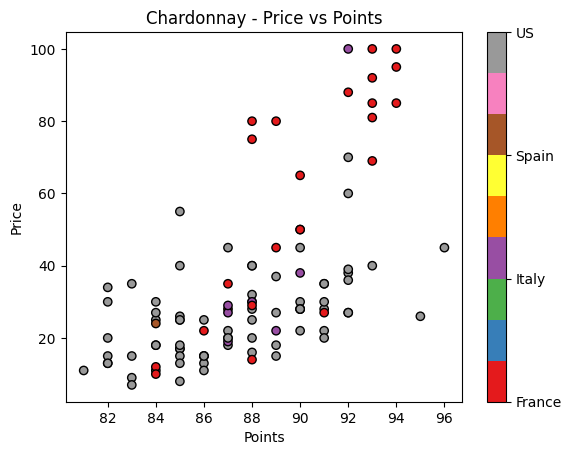

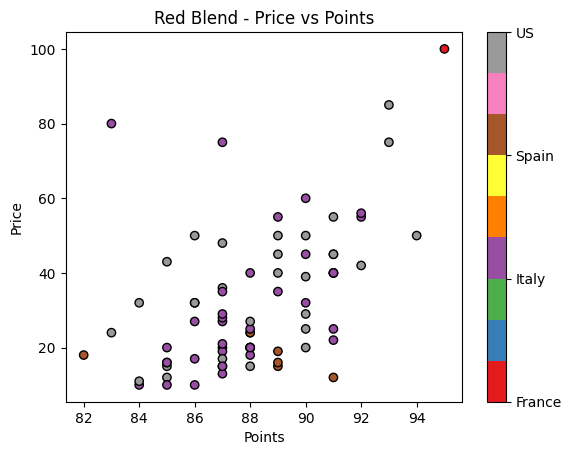

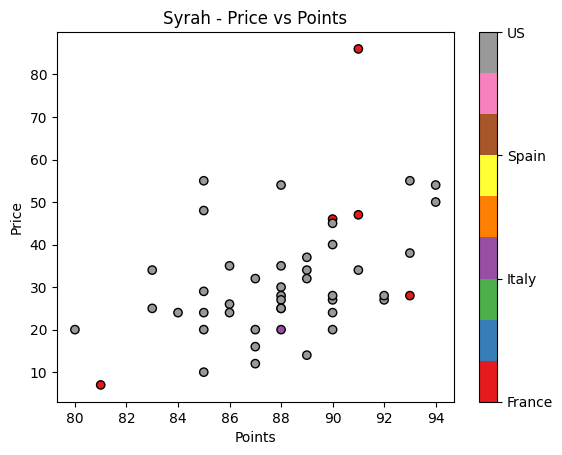

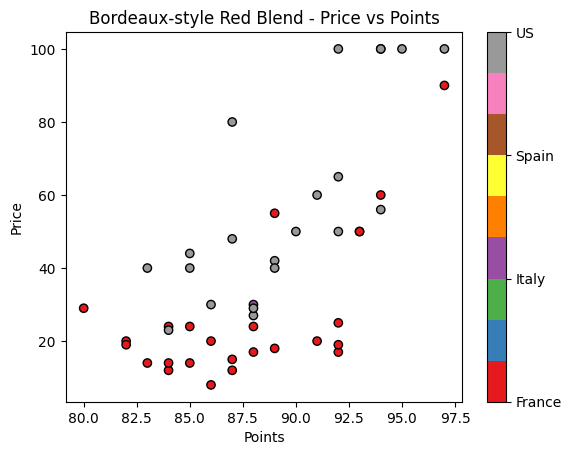

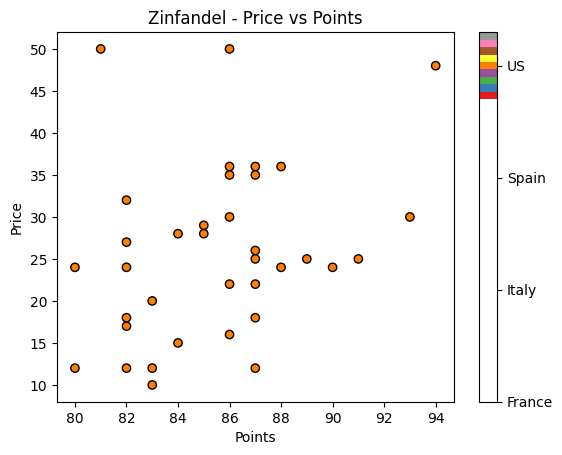

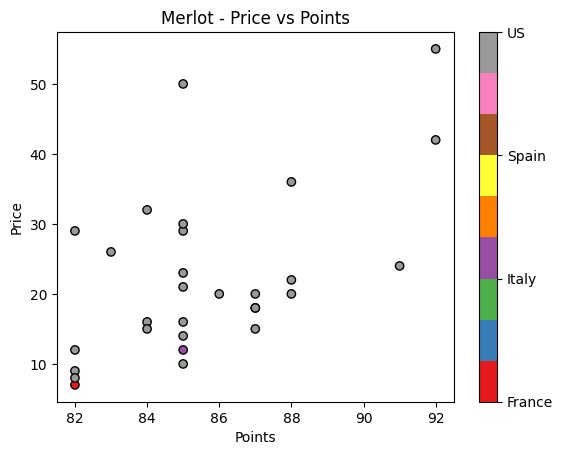

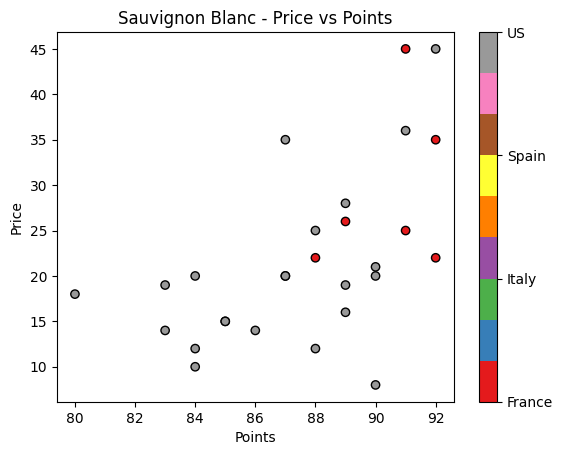

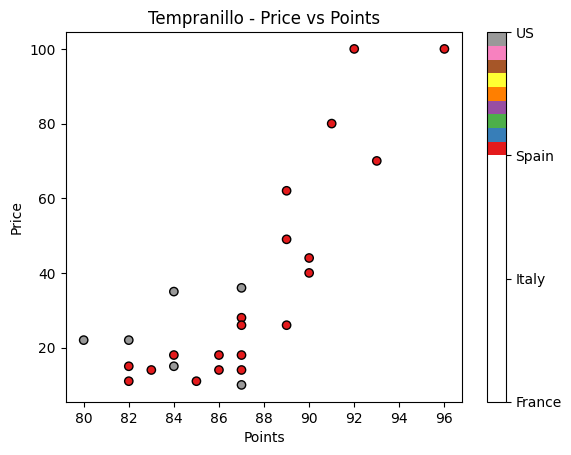

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_variety = label_encoder.fit_transform(X_DATA["variety"])

unique_varieties = label_encoder.classes_

variety_counts = X_DATA["variety"].value_counts()

top_10_varieties = variety_counts.head(10).index

for variety in top_10_varieties:
    variety_data = X_DATA[X_DATA["variety"] == variety]
    y_val_indices_variety = y_val_indices[X_DATA["variety"] == variety]

    plt.figure()
    scatter = plt.scatter(variety_data["points"], variety_data["price"], c=y_val_indices_variety, cmap=plt.cm.Set1, edgecolors="k")
    plt.xlabel("Points")
    plt.ylabel("Price")
    plt.title(f"{variety} - Price vs Points")
    
    colorbar = plt.colorbar(scatter)
    colorbar.set_ticks(np.arange(len(unique_countries)))
    colorbar.set_ticklabels(unique_countries)

    plt.show()


Validation accuracy: 0.72
Test accuracy: 0.65
Feature importance: [0.55219833 0.19669788 0.2511038 ]


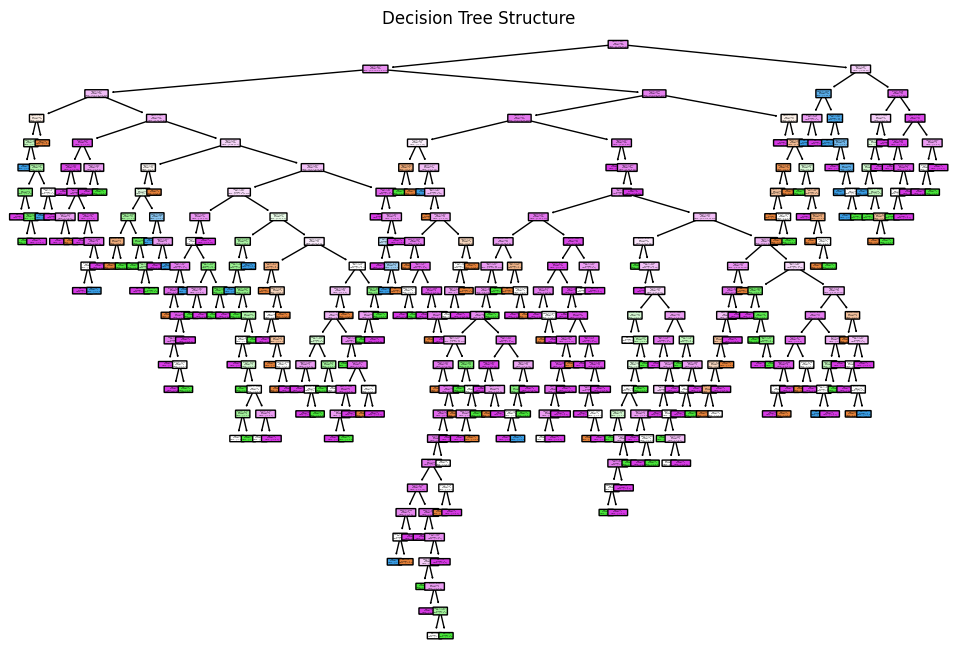

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
encoded_country = label_encoder.fit_transform(Y_DATA["country"])

X = X_DATA[["variety", "points", "price"]].copy()
X["variety"] = label_encoder.fit_transform(X["variety"])
y = encoded_country

scaler = StandardScaler()
X[["points", "price"]] = scaler.fit_transform(X[["points", "price"]])

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

val_accuracy = dt_model.score(X_val, y_val)
print(f"Validation accuracy: {val_accuracy:.2f}")

test_accuracy = dt_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

feature_importance = dt_model.feature_importances_
print("Feature importance:", feature_importance)

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


Reloading Tuner from my_dir\wine_classification\tuner0.json
Best hyperparameters: {'layers': 2, 'units_0': 192, 'dropout': 0.0, 'learning_rate': 0.0001, 'units_1': 224, 'units_2': 32}
Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0641 - loss: 4.0335 - val_accuracy: 0.0750 - val_loss: 2.5803
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0663 - loss: 2.2567 - val_accuracy: 0.4750 - val_loss: 1.3797
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5024 - loss: 1.3210 - val_accuracy: 0.6187 - val_loss: 1.1822
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6422 - loss: 1.2075 - val_accuracy: 0.6187 - val_loss: 1.1951
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6162 - loss: 1.2311 - val_accuracy: 0.6187 - val_loss: 1.1846
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6073 - loss: 1.2550 - val_accuracy: 0.6187 - val_loss: 1.2021
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.646

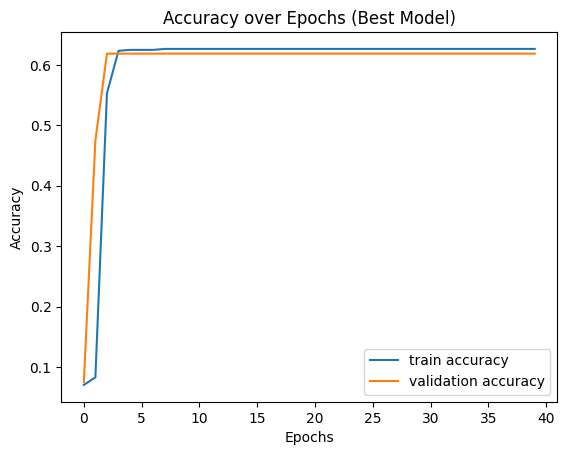

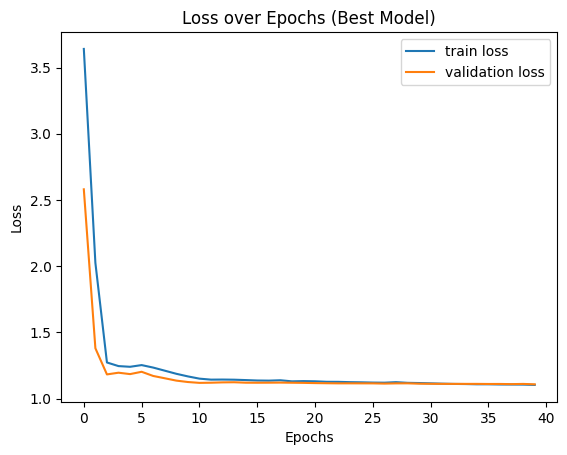

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
encoded_country = label_encoder.fit_transform(Y_DATA["country"])

X = X_DATA[["variety", "points", "price"]].copy()  # Include variety, points, and price as features
X["variety"] = label_encoder.fit_transform(X["variety"])  # Convert variety to numeric values
y = encoded_country

scaler = StandardScaler()
X[["points", "price"]] = scaler.fit_transform(X[["points", "price"]])

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define the input layer
    
    for i in range(hp.Int("layers", 1, 3)):  # Trying between 1 and 3 hidden layers
        model.add(Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
            activation="relu"
        ))
        if hp.Choice("dropout", [0.0, 0.2, 0.5]) > 0:
            model.add(Dropout(hp.Choice("dropout", [0.0, 0.01, 0.05, 0.1, 0.2])))

    model.add(Dense(len(np.unique(y)), activation="softmax"))  # Output layer for multi-class classification
    
    model.compile(
        optimizer=Adam(hp.Choice("learning_rate", [0.01, 0.001, 0.0001])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=11,
    executions_per_trial=1,
    directory="my_dir",
    project_name="wine_classification"
)

# early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128)
# tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128, callback=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=128)
# history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=128, callback=[early_stopping])

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs (Best Model)")
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs (Best Model)")
plt.show()


Epoch 1/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.1694 - loss: 4.5970 - val_accuracy: 0.1750 - val_loss: 3.1873
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1568 - loss: 2.8436 - val_accuracy: 0.1750 - val_loss: 1.6646
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2699 - loss: 1.4944 - val_accuracy: 0.6125 - val_loss: 1.1609
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6491 - loss: 1.1876 - val_accuracy: 0.6187 - val_loss: 1.2774
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6243 - loss: 1.3325 - val_accuracy: 0.6187 - val_loss: 1.3305
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6009 - loss: 1.3875 - val_accuracy: 0.6187 - val_loss: 1.2753
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6214 - loss: 1.2754 - val_accuracy: 0.6187 - val_loss: 1.2153
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6151 - loss: 1.2360 - val_accuracy: 0.6187 - val_loss: 1.1643
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4040 - loss: 6.4382 - val_accuracy: 0.1750 - val_loss: 5.5580
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4307 - loss: 4.2793 - val_accuracy: 0.6187 - val_loss: 3.0721
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4648 - loss: 2.8565 - val_accuracy: 0.3375 - val_loss: 1.9773
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4317 - loss: 1.5458 - val_accuracy: 0.3875 - val_loss: 1.3531
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5532 - loss: 1.3646 - val_accuracy: 0.6187 - val_loss: 1.4327
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5981 - loss: 1.4006 - val_accuracy: 0.5188 - val_loss: 1.3009
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5848 - loss: 1.2232 - val_accuracy: 0.6187 - val_loss: 1.1722
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6596 - loss: 1.0991 - val_accuracy: 0.6187 - val_loss: 1.1208
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.0683 - loss: 4.9491 - val_accuracy: 0.0625 - val_loss: 3.9299
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1257 - loss: 3.8444 - val_accuracy: 0.0875 - val_loss: 2.7880
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2056 - loss: 3.1882 - val_accuracy: 0.5000 - val_loss: 2.0653
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3576 - loss: 2.7052 - val_accuracy: 0.6187 - val_loss: 1.8535
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4076 - loss: 2.4160 - val_accuracy: 0.6187 - val_loss: 1.8036
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4787 - loss: 2.2820 - val_accuracy: 0.6187 - val_loss: 1.7085
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5207 - loss: 2.0828 - val_accuracy: 0.6187 - val_loss: 1.5684
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4834 - loss: 2.0180 - val_accuracy: 0.6187 - val_loss: 1.4040


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.1788 - loss: 4.0091 - val_accuracy: 0.1750 - val_loss: 3.2748
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2164 - loss: 3.1974 - val_accuracy: 0.1750 - val_loss: 2.6677
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2114 - loss: 2.7348 - val_accuracy: 0.1688 - val_loss: 2.1730
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2649 - loss: 2.3425 - val_accuracy: 0.1937 - val_loss: 1.7708
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3391 - loss: 2.1849 - val_accuracy: 0.6000 - val_loss: 1.5252
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4179 - loss: 2.0300 - val_accuracy: 0.6250 - val_loss: 1.4685
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4571 - loss: 1.9691 - val_accuracy: 0.6313 - val_loss: 1.4822
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4768 - loss: 1.8169 - val_accuracy: 0.6313 - val_loss: 1.4914
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.1816 - loss: 2.6520 - val_accuracy: 0.2188 - val_loss: 1.5367
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3723 - loss: 1.7623 - val_accuracy: 0.6125 - val_loss: 1.3316
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5441 - loss: 1.6737 - val_accuracy: 0.6187 - val_loss: 1.4277
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5918 - loss: 1.5548 - val_accuracy: 0.6187 - val_loss: 1.3491
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5596 - loss: 1.5367 - val_accuracy: 0.6187 - val_loss: 1.2196
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5325 - loss: 1.4754 - val_accuracy: 0.6125 - val_loss: 1.1648
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4547 - loss: 1.4600 - val_accuracy: 0.6125 - val_loss: 1.1440
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5010 - loss: 1.4493 - val_accuracy: 0.6125 - val_loss: 1.1544
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1543 - loss: 5.8819 - val_accuracy: 0.1688 - val_loss: 4.9307
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1670 - loss: 4.6966 - val_accuracy: 0.1688 - val_loss: 3.8205
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1752 - loss: 3.5348 - val_accuracy: 0.1688 - val_loss: 2.8679
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2315 - loss: 2.7877 - val_accuracy: 0.6187 - val_loss: 2.4080
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6111 - loss: 2.5175 - val_accuracy: 0.6187 - val_loss: 2.3175
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6216 - loss: 2.3262 - val_accuracy: 0.6187 - val_loss: 2.2330
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6397 - loss: 2.1804 - val_accuracy: 0.6187 - val_loss: 2.0978
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6375 - loss: 2.1329 - val_accuracy: 0.6187 - val_loss: 1.9247
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.1247 - loss: 6.0781 - val_accuracy: 0.0625 - val_loss: 4.4585
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1330 - loss: 5.4119 - val_accuracy: 0.0625 - val_loss: 3.7635
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1651 - loss: 4.4862 - val_accuracy: 0.0625 - val_loss: 3.1305
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1622 - loss: 3.9958 - val_accuracy: 0.0625 - val_loss: 2.5497
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2056 - loss: 3.6395 - val_accuracy: 0.0625 - val_loss: 1.9681
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2470 - loss: 3.1502 - val_accuracy: 0.1187 - val_loss: 1.5317
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2828 - loss: 2.9100 - val_accuracy: 0.6125 - val_loss: 1.3833
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4133 - loss: 2.5651 - val_accuracy: 0.6187 - val_loss: 1.3395
Epoch 9/40


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3142 - loss: 9.7210 - val_accuracy: 0.6187 - val_loss: 4.2179
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5388 - loss: 3.3569 - val_accuracy: 0.6187 - val_loss: 1.1521
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5311 - loss: 1.3029 - val_accuracy: 0.6187 - val_loss: 1.1350
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6448 - loss: 1.1539 - val_accuracy: 0.6187 - val_loss: 1.1390
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6229 - loss: 1.1611 - val_accuracy: 0.6187 - val_loss: 1.0974
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6252 - loss: 1.1464 - val_accuracy: 0.6187 - val_loss: 1.0906
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6196 - loss: 1.1233 - val_accuracy: 0.6187 - val_loss: 1.0832
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6079 - loss: 1.1250 - val_accuracy: 0.6187 - val_loss: 1.0779
Epoch 9/40
5

c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1111 - loss: 9.1025 - val_accuracy: 0.6313 - val_loss: 1.2372
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3815 - loss: 3.2241 - val_accuracy: 0.6187 - val_loss: 3.4837
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5976 - loss: 3.9172 - val_accuracy: 0.6187 - val_loss: 3.0033
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5730 - loss: 2.9179 - val_accuracy: 0.6187 - val_loss: 1.6720
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4447 - loss: 2.2695 - val_accuracy: 0.6187 - val_loss: 1.1341
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3589 - loss: 2.3138 - val_accuracy: 0.6187 - val_loss: 1.1969
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4382 - loss: 1.7328 - val_accuracy: 0.6187 - val_loss: 1.3466
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5728 - loss: 1.4509 - val_accuracy: 0.6187 - val_loss: 1.2612
Epoch 9/40
5/

c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.4088 - loss: 2.0782 - val_accuracy: 0.6187 - val_loss: 1.1843
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5403 - loss: 1.3078 - val_accuracy: 0.6187 - val_loss: 1.1370
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6143 - loss: 1.2043 - val_accuracy: 0.6187 - val_loss: 1.1143
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6116 - loss: 1.1473 - val_accuracy: 0.6187 - val_loss: 1.1020
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6248 - loss: 1.1414 - val_accuracy: 0.6187 - val_loss: 1.1013
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6209 - loss: 1.1085 - val_accuracy: 0.6187 - val_loss: 1.0874
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6201 - loss: 1.1174 - val_accuracy: 0.6187 - val_loss: 1.0918
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6349 - loss: 1.0905 - val_accuracy: 0.6187 - val_loss: 1.1051
Epoch 9/40

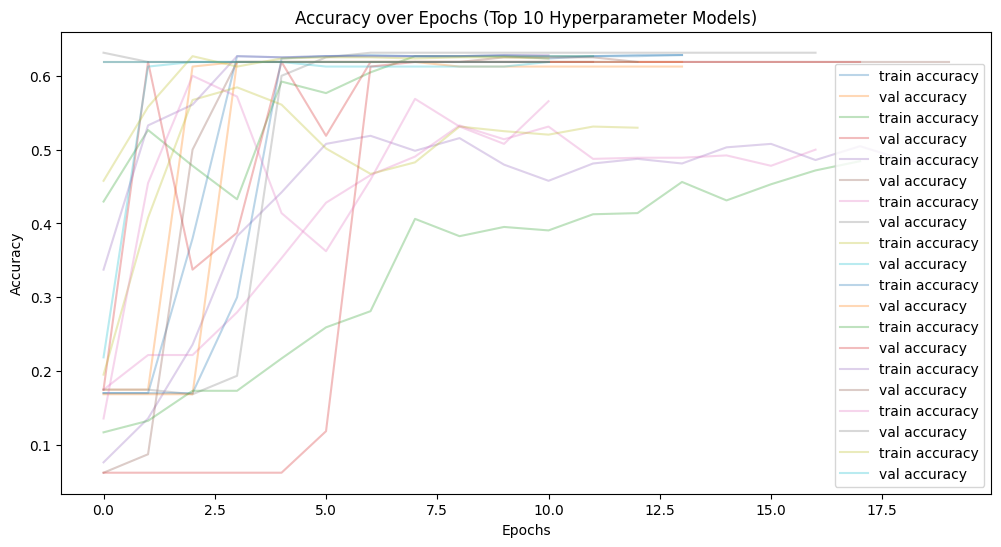

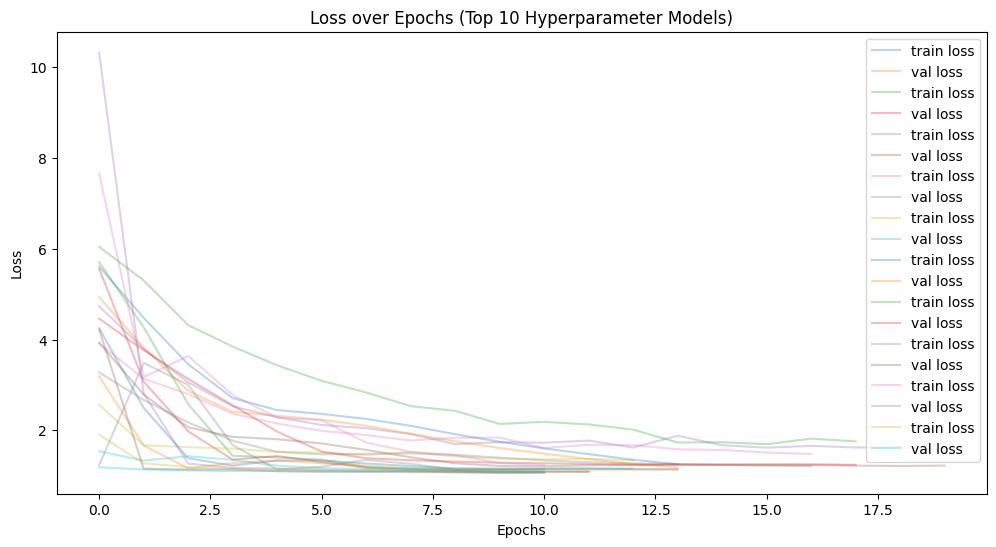

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
encoded_country = label_encoder.fit_transform(Y_DATA["country"])

X = X_DATA[["variety", "points", "price"]].copy()
X["variety"] = label_encoder.fit_transform(X["variety"])
y = encoded_country

scaler = StandardScaler()
X[["points", "price"]] = scaler.fit_transform(X[["points", "price"]])

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

best_hps_list = tuner.oracle.get_best_trials(num_trials=10)

all_histories = []

for best_hps in best_hps_list:
    model = Sequential()
    model.add(Dense(best_hps.hyperparameters["units_0"], input_dim=X_train.shape[1], activation="relu"))
    
    for _ in range(best_hps.hyperparameters["layers"] - 1):
        model.add(Dense(best_hps.hyperparameters["units_1"], activation="relu"))
    
    if best_hps.hyperparameters["dropout"] > 0:
        model.add(Dropout(best_hps.hyperparameters["dropout"]))
    
    model.add(Dense(len(np.unique(y)), activation="softmax"))

    model.compile(optimizer=Adam(best_hps.hyperparameters["learning_rate"]), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=128, callbacks=[early_stopping])

    all_histories.append(history)

plt.figure(figsize=(12, 6))

for history in all_histories:
    plt.plot(history.history["accuracy"], label="train accuracy", alpha=0.3)
    plt.plot(history.history["val_accuracy"], label="val accuracy", alpha=0.3)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs (Top 10 Hyperparameter Models)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

for history in all_histories:
    plt.plot(history.history["loss"], label="train loss", alpha=0.3)
    plt.plot(history.history["val_loss"], label="val loss", alpha=0.3)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs (Top 10 Hyperparameter Models)")
plt.legend()
plt.show()


In [ ]:
# import torch
# from transformers import BertTokenizer, BertModel
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# import multiprocessing

# # Load pre-trained BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Function to get BERT embedding for a description (for one batch of descriptions)
# def get_batch_embeddings(descriptions):
#     inputs = tokenizer(descriptions, return_tensors='pt', truncation=True, padding=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     last_hidden_state = outputs.last_hidden_state
#     embeddings = last_hidden_state.mean(dim=1).squeeze().numpy()  # Shape: (batch_size, hidden_size)
#     print(embeddings[0, 0])
#     return embeddings

# # Function to generate embeddings in parallel using multiprocessing
# def generate_embeddings_parallel(descriptions, batch_size=4):
#     with multiprocessing.Pool() as pool:
#         # Split descriptions into batches
#         batches = [descriptions[i:i + batch_size] for i in range(0, len(descriptions), batch_size)]
#         embeddings = pool.map(get_batch_embeddings, batches)
#     # Flatten the list of embeddings
#     return np.vstack(embeddings)

# # Extract features and labels
# X_data = data[["points", "price", "variety", "description"]]
# y_data = data["country"]

# # Encode the 'variety' column
# label_encoder = LabelEncoder()
# X_data["variety"] = label_encoder.fit_transform(X_data["variety"])

# # Standardize the numerical features
# scaler = StandardScaler()
# X_data[["points", "price"]] = scaler.fit_transform(X_data[["points", "price"]])

# print("embedding")

# # Generate embeddings for each wine description in parallel
# embeddings = generate_embeddings_parallel(X_data["description"])

# print("Generated embeddings")

# # Combine the embeddings with other numerical features
# X_final = np.concatenate((embeddings, X_data[["points", "price", "variety"]].values), axis=1)

# # Encode the target labels
# y = label_encoder.fit_transform(y_data)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# # Initialize and train a Random Forest classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)
# # YspgxAulhv3CQnaLm6d4M4dPkboijSYYXksxln8c
# # Evaluate the classifier on the test set
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\gamin\AppData\Local\Temp\ipykernel_21776\3012198471.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["variety"] = label_encoder.fit_transform(X_data["variety"])
C:\Users\gamin\AppData\Local\Temp\ipykernel_21776\3012198471.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

embedding


In [6]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embedding for a description
def get_description_embedding(description):
    # Tokenize the description
    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Get the model output (hidden states)
    with torch.no_grad():
        outputs = model(**inputs)

    # Take the mean of the last layer hidden states to form the embedding
    last_hidden_state = outputs.last_hidden_state
    embedding = last_hidden_state.mean(dim=1).squeeze().numpy()  # Shape: (hidden_size,)

    return embedding

# Extract features and labels
X_data = data[["points", "price", "variety", "description"]]
y_data = data["country"]

# Encode the 'variety' column
label_encoder = LabelEncoder()
X_data["variety"] = label_encoder.fit_transform(X_data["variety"])

# Standardize the numerical features
scaler = StandardScaler()
X_data[["points", "price"]] = scaler.fit_transform(X_data[["points", "price"]])

# Generate embeddings for each wine description
embeddings = []
for description in X_data["description"]:
    embedding = get_description_embedding(description)
    embeddings.append(embedding)
    print(embedding[0])

print("\nGenerated embeddings\n")

# Convert embeddings list to a numpy array
X_embeddings = np.array(embeddings)

# Combine the embeddings with other numerical features
X_final = np.concatenate((X_embeddings, X_data[["points", "price", "variety"]].values), axis=1)

# Encode the target labels
y = label_encoder.fit_transform(y_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\gamin\AppData\Local\Temp\ipykernel_18064\69861371.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data["variety"] = label_encoder.fit_transform(X_data["variety"])
C:\Users\gamin\AppData\Local\Temp\ipykernel_18064\69861371.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data[["points", "price"]] = scaler.fit_transform(X_data[["points", "price"]])


-0.16830924
-0.29631013
-0.018430836
0.07613633
-0.27430922
-0.07923702
-0.25873306
-0.136602
-0.004960303
-0.40994084
-0.29654408
-0.09419595
0.24060632
-0.16828406
-0.059833314
-0.41255304
-0.3422482
-0.4130731
-0.15317516
0.05732215
0.019038904
-0.15617082
-0.05612687
-0.10484331
-0.30017936
-0.13762602
-0.20341513
-0.08810384
-0.33129418
-0.44179356
-0.14542201
-0.20955628
-0.053660322
0.04591857
-0.13042969
-0.17366941
-0.13857692
-0.24914229
-0.28854856
-0.4275895
-0.10518764
-0.13989355
-0.4363292
-0.21370454
-0.21997836
-0.12941295
-0.2568572
-0.09201674
0.21730347
-0.14690374
-0.37196556
-0.2944698
-0.29933426
-0.057876524
-0.057016406
-0.27089018
-0.12905061
-0.14344127
-0.44084233
-0.35343724
-0.03874987
-0.3267532
0.007787953
-0.17969628
-0.08845707
-0.1274415
-0.23674673
-0.27971667
-0.40330383
-0.2241074
-0.47503138
-0.016395452
-0.061233904
0.08938863
-0.28011188
-0.13776948
-0.48457828
-0.029166277
-0.17605506
-0.2759032
-0.37852314
-0.3524149
-0.3724656
-0.33180225
-0.

c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gamin\Downloads\wineClassing\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",